In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from bs4 import BeautifulSoup 
import requests

from RGGI_plant_analysis import RGGI_capacity
from Analyse_PJM_generation import clean_historical_generators,calculate_historical_PJM_share
from Analyse_PJM_capacity import run_full_relative_capacity_PJM
from datetime import datetime as dt

In [2]:
import sys
from statistics import NormalDist
import subprocess
import os 

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

from enviro_vars import set_environmental_variables
try:       
    set_environmental_variables()
except Exception as e:
    print(e)
    print('in online environment - no enviro_vars module')

############# ADD GIT TOKEN BELOW ############
git_token = os.environ['gittoken']
AUTHORITY = os.environ['azAuth']
CLIENT_ID = os.environ['azClientid']
SECRET = os.environ['AzAppSecret']
location =  {"authority": AUTHORITY,"client_id": CLIENT_ID,'secret':SECRET,"scope": [ "https://graph.microsoft.com/.default" ]}

##
github_repository = f"git+https://{git_token}@github.com/research-carbon-cap/SharePointv2.git@Azure_functions"

install(github_repository)


from SharePointv2.Sharepoint_API import GRAPH_API

Environment variables set!


In [3]:
from get_overall_generation_and_PJM_share import run_full_generators_assessment_and_RGGI_PJM_proportion

In [4]:
rggi_share, rggi_share_pjm_capacity_fig,rggi_share_pjm_generation_fig,full_time_series,gen_df,pjm_planned_retired,isne_planned_retired,nyis_planned_retired  = run_full_generators_assessment_and_RGGI_PJM_proportion(location,read_latest=True)

saving down data for 2024-09-01
Operating
Canceled or Postponed
Operating_PR
Planned
Planned_PR
Retired
Retired_PR


c:\GitHub\RGGI_capacity_data\RGGI_plant_analysis.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RGGI_plants['Fossil'] =  np.where(RGGI_plants['Technology'].isin(self.Fossil_tech),1,0)
c:\GitHub\RGGI_capacity_data\RGGI_plant_analysis.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RGGI_plants['PlantName_GenID'] = RGGI_plants['Plant Name'] +' '+ RGGI_plants['Generator ID']
c:\GitHub\RGGI_capacity_data\RGGI_plant_analysis.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

EIA923_Schedules_2_3_4_5_M_12_2019_Final_Revision.xlsx
Page 1 Energy Storage
Page 1 Generation and Fuel Data
Page 1 Puerto Rico
Page 2 Coal Stocks Data
Page 2 Oil Stocks Data
Page 2 Petcoke Stocks Data
Page 2 Stocks Data
Page 3 Boiler Fuel Data
Page 4 Generator Data
Page 5 Fuel Receipts and Costs
Page 6 Plant Frame
Page 6 Plant Frame Puerto Rico
EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx
Page 1 Generation and Fuel Data
Page 1 Energy Storage
Page 1 Puerto Rico
Page 2 Coal Stocks Data
Page 2 Oil Stocks Data
Page 2 Petcoke Stocks Data
Page 2 Stocks Data
Page 3 Boiler Fuel Data
Page 4 Generator Data
Page 5 Fuel Receipts and Costs
Page 6 Plant Frame
Page 6 Plant Frame Puerto Rico
EIA923_Schedules_2_3_4_5_M_12_2021_Final_Revision.xlsx
Page 1 Energy Storage
Page 1 Generation and Fuel Data
Page 1 Puerto Rico
Page 2 Coal Stocks Data
Page 2 Oil Stocks Data
Page 2 Petcoke Stocks Data
Page 2 Stocks Data
Page 3 Boiler Fuel Data
Page 4 Generator Data
Page 5 Fuel Receipts and Costs
Page 6

c:\GitHub\RGGI_capacity_data\Analyse_PJM_generation.py:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\GitHub\RGGI_capacity_data\Analyse_PJM_generation.py:126: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\GitHub\RGGI_capacity_data\Analyse_PJM_generation.py:127: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [5]:
fig = px.line(full_time_series.reset_index().groupby(['Date','PJM_tech'])['RGGI_share'].mean().unstack('PJM_tech'),labels={'value':'RGGI share of PJM month Generation %'},
              title='RGGI share of PJM monthly power generation - historical and forecast')
fig.update_layout(yaxis_tickformat='.0%',width=1000)

In [6]:
gen_df['Balancing\nAuthority Code'].unique()

array(['PJM', 'NYIS', 'ISNE', 'NBSO', 'SOCO',
       'State-Fuel Level Increment'], dtype=object)

In [7]:
pjm_hydro = gen_df[(gen_df['Balancing\nAuthority Code']=='PJM') | (gen_df['RGGI_state']==1)].query('PJM_tech=="Hydro" and YEAR<2024').groupby(['YEAR','month','Plant Name','RGGI_state'])['Generation MWh_clipped'].sum()

In [8]:
(pjm_hydro.reset_index().groupby(['Plant Name','RGGI_state'])['Generation MWh_clipped'].mean().sort_values(ascending=False).head(10)/pjm_hydro.reset_index().groupby(['Plant Name','RGGI_state'])['Generation MWh_clipped'].mean().sort_values(ascending=False).sum()).to_frame('% avg monthly total hydro')

,,% avg monthly total hydro
Plant Name,RGGI_state,
Robert Moses Niagara,1,0.359194
Robert Moses Power Dam,1,0.162901
Conowingo,1,0.041666
Safe Harbor,0,0.024194
Holtwood,0,0.021596
Great Lakes Hydro America - ME,1,0.014072
Meldahl Hydroelectric Project,0,0.011791
John H Kerr,0,0.011379
Hawks Nest Hydro,0,0.011116


In [9]:
px.box(pjm_hydro.reset_index(),x='Plant Name',y='Generation MWh_clipped',color='RGGI_state',points='all',height=600,
       title='ALL RGGI and PJM Hydro Generation Plants monthly power generation',labels={'value':'MWh'})

In [10]:
px.line(rggi_share.reset_index().groupby(['Date','PJM_tech'])['RGGI_share'].mean().unstack('PJM_tech'))

In [11]:
summary = gen_df[gen_df['Balancing\nAuthority Code']=='PJM'].groupby(['Date','RGGI_state'])['Generation MWh'].sum().unstack('RGGI_state')

In [12]:
summary['total_pjm'] = summary[[0,1]].sum(axis=1)

In [13]:
(summary[1]/summary['total_pjm']).mean()

0.12176919545386944

In [14]:
px.line(summary[[1,'total_pjm']],labels={'value':'MWh'})

In [15]:
gen_df['Qtr'] = gen_df.Date.dt.quarter

In [16]:
## RGGI Compliance Data Compare

In [17]:
def generate_comparison(RGGI_compliance,rggi_or_pjm_capacity,ID):
    test = RGGI_compliance.query(f'`ORIS Code`=={ID} and Year>2019').sort_values(['Year','Qtr']).groupby(['Year','Qtr'])['Compliance Emissions (Tons)'].sum()
    compare = rggi_or_pjm_capacity.query(f'`Plant Id`=={ID} and YEAR>2019 and `Nameplate Capacity (MW)`>35').set_index('Date').groupby(['YEAR','Qtr'])[['Generation MWh_clipped','Emissions_stCO2']].sum().reset_index().join(test,on=['YEAR','Qtr'])
    
    fig = px.scatter(compare,x='Emissions_stCO2',y='Compliance Emissions (Tons)',hover_data=['YEAR','Qtr'],trendline='ols')
    rsqr = px.get_trendline_results(fig).iloc[0][0].rsquared_adj
    const = px.get_trendline_results(fig).iloc[0][0].params[0]
    x1 = px.get_trendline_results(fig).iloc[0][0].params[1]
    
    bar_fig = px.bar(compare[['Emissions_stCO2','Compliance Emissions (Tons)']],barmode='group')
    avg_capacity = rggi_or_pjm_capacity.query(f'`Plant Id`=={ID} and YEAR>2019 and `Nameplate Capacity (MW)`>35')['Nameplate Capacity (MW)'].mean()
    return fig, rsqr, bar_fig,avg_capacity,const,x1

In [18]:
import os
RGGI_compliance = pd.read_excel(fr'{os.environ["USERPROFILE"]}\OneDrive - Carbon Cap\Carbon markets research\US Markets\RGGI\RGGI Model.xlsx',sheet_name='R2. RGGI Emissions',header=5)
RGGI_compliance = RGGI_compliance[[ 'Pland Generator ID',
                                                                                        'Year',
                                                                                         'Qtr',
                                                                                 'Source Name',
                                                                                   'ORIS Code',
                                                                                  'Unit ID(s)',
                                                                                       'State',
                                                                                  'State Name',
                                                                            'State Identifier',
                                                                              'Control Period',
                                                                                     'Op Time',
                                                                                    'Op Hours',
                                                                             'CO2 Mass (Tons)',
                                                                          'Heat Input (mmBtu)',
                                                       'Eligible Biomass (Tons) (State Value)',
                                            'Eligible CHP Thermal Output (Tons) (State Value)',
                                                                                           'N',
                                                                 'Compliance Emissions (Tons)',
                                                            'CO2 efficiency (tons/heat input)',
                                                                        'IN EIA 2018 database',
                                                                                  'Technology',
                                                                        'Summer Capacity (MW)',
                           'not subject to 2009-2012 RGGI CO2 allowance compliance obligation',
                           'not subject to 2009-2020 RGGI CO2 allowance compliance obligation',
                           'not subject to 2018-2020 RGGI CO2 allowance compliance obligation',
                           'not subject to 2018-2022 RGGI CO2 allowance compliance obligation',
       '(MD LIESA source - not subject to 2018-2023 RGGI CO2 allowance compliance obligation)',
                                                                       'Quarter Auction Price']]





In [19]:
unique_RGGI_plants = RGGI_compliance.query('State!="VA" and State!="PA" and `Compliance Emissions (Tons)`>0')['ORIS Code'].unique() #.groupby('Year')

In [20]:
len(unique_RGGI_plants)

227

In [21]:
top_ten_facilities = RGGI_compliance.query('State!=["VA","PA"]').groupby(['ORIS Code','Year'])['Compliance Emissions (Tons)'].sum().unstack('Year').iloc[:,-5:-1].fillna(0).mean(axis=1).sort_values(ascending=False).head(100).index



In [22]:
total_2023 = RGGI_compliance.query('State!=["VA","PA"]').groupby(['ORIS Code','Year'])['Compliance Emissions (Tons)'].sum().unstack('Year')[2023].sort_values(ascending=False)#.sum()

In [23]:
len(total_2023[total_2023>0].to_frame().dropna())

177

In [24]:
top_40_2023_emissions = (RGGI_compliance.query('State!=["VA","PA"]').groupby(['ORIS Code','Year'])['Compliance Emissions (Tons)'].sum().unstack('Year')[2023].sort_values(ascending=False)/total_2023).dropna()#.head(100)

In [25]:
top_40_2023_emissions.sum()

177.0

In [26]:
len(unique_RGGI_plants)

227

In [27]:
res_dict = {'ID':['fig','r_sqr','bar_fig','capacity','const','x1']}
error_dict={}
for x in unique_RGGI_plants:
        try:
                fig, rsqr, bar_fig,avg_capacity,const,x1 = generate_comparison(RGGI_compliance,gen_df,x)
                res_dict[x]= [fig, rsqr, bar_fig,avg_capacity,const,x1]
        except Exception as e:
                error_dict[x]=e

C:\Users\Alex Child\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alex Child\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning:

invalid value encountered in scalar multiply

C:\Users\Alex Child\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning:

invalid value encountered in scalar divide



In [28]:
error_dict

{3754: IndexError('single positional indexer is out-of-bounds'),
 10619: IndexError('single positional indexer is out-of-bounds'),
 50472: IndexError('single positional indexer is out-of-bounds'),
 54605: IndexError('single positional indexer is out-of-bounds'),
 63559: IndexError('single positional indexer is out-of-bounds'),
 548: IndexError('single positional indexer is out-of-bounds'),
 1552: IndexError('single positional indexer is out-of-bounds'),
 1553: IndexError('single positional indexer is out-of-bounds'),
 1559: IndexError('single positional indexer is out-of-bounds'),
 1570: IndexError('single positional indexer is out-of-bounds'),
 1606: IndexError('single positional indexer is out-of-bounds'),
 1613: IndexError('single positional indexer is out-of-bounds'),
 1619: IndexError('single positional indexer is out-of-bounds'),
 1626: IndexError('single positional indexer is out-of-bounds'),
 2378: IndexError('single positional indexer is out-of-bounds'),
 2380: IndexError('sin

In [29]:
len(error_dict.keys())

39

In [30]:
res_df = pd.DataFrame.from_dict(res_dict).transpose()
res_df.columns= res_df.iloc[0]
res_df = res_df.iloc[1:]

In [31]:
res_df.capacity = res_df.capacity.astype(float)

In [32]:
len(res_df)

188

In [33]:
res_df.iloc[30].name

2490

In [34]:
px.get_trendline_results(res_df.iloc[30]['fig']).iloc[0][0].summary()

C:\Users\Alex Child\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.166e+05
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.68e-34
Time:                        11:24:52   Log-Likelihood:                -157.04
No. Observations:                  19   AIC:                             318.1
Df Residuals:                      17   BIC:                             320.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -586.0359    533.882     -1.098      0.288   -1712.429     540.357
x1             1.2399      0.004    341.524      0.000       1.232       1.248
==============================================================================
Omnibus:                       10.794   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.463
Skew:                          -1.183   Prob(JB):                       0.0145
Kurtosis:                       5.257   Cond. No.                     3.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
res_df.iloc[30]['fig'].update_layout(width=800,title=f'Example OLS fit for estimated vs actual emissions <br>for plant ID {res_df.iloc[30].name} over 2019-2024')

In [36]:
(res_df['r_sqr']*res_df['capacity']).sum()/res_df['capacity'].sum()

0.8996931865842441

In [37]:
res_df['r_sqr'].mean()

0.843467769731306

In [38]:
fig = px.scatter(res_df.reset_index(),y='r_sqr',x='index',size='capacity',labels={'index':'Plant ID'},width=800)
fig.update_layout(yaxis_tickformat='.1%')

In [39]:
len(res_df)

188

In [40]:
(res_df['r_sqr']>=0.6).sum()/len(res_df)

0.8457446808510638

In [41]:
fig = px.box(res_df.reset_index(),y='r_sqr',hover_data='index',points='all',)#,points='all'
fig.update_layout(yaxis_tickformat='.1%',title='Box Whisker Plot for R-squared for all 188 RGGI plant regressions',width=800)

In [42]:
top_40_2023_emissions[top_40_2023_emissions.index.isin(res_df.query('r_sqr>.3 and x1>0').index)].sum()

157.0

In [43]:
res_df.query('r_sqr>.3 and x1>0')[['const','x1']]

ID,const,x1
546,-663.64407,1.167496
562,48.542443,1.266369
568,63170.922026,1.013573
591,-3.135732,1.19706
593,1823.878901,1.299624
...,...,...
50498,11.21693,1.034971
50852,0.0,1.202628
52056,-2938.622056,1.249497
54056,45.164539,1.352349


In [44]:
gen_df_with_coeff = gen_df.join(res_df.query('r_sqr>0.6 and x1>0')[['const','x1']],on='Plant Id')

In [45]:
gen_df_with_coeff.query('`Plant Id`==50006').groupby(['YEAR','Reported\nFuel Type Code'])['Nameplate Capacity (MW)','Emissions_stCO2'].mean()

C:\Users\Alex Child\AppData\Local\Temp\ipykernel_19656\2713743315.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Nameplate Capacity (MW)  Emissions_stCO2
YEAR Reported\nFuel Type Code                                          
2019 DFO                                           NaN        45.747108
     NG                                          974.1    208785.373970
     WO                                            NaN       708.026512
2020 DFO                                           NaN        59.383804
     NG                                          974.1    200132.652554
     WO                                            NaN         0.000000
2021 DFO                                           NaN        85.356862
     NG                                          974.1    211495.985543
     WO                                            NaN       931.793143
2022 DFO                                           NaN        11.114496
     NG                                          974.1    205853.774344
     WO                                            NaN       521.730539
2023 DFO                                           NaN       470.070870
     NG                                          974.1    213616.347662
     OG                                            NaN      1033.625534
     WO                                            NaN        20.978646
2024 DFO                                           NaN         0.000000
     NG                                          974.1    165491.739427
     OG                                            NaN       845.656892
     WO                                            NaN         0.000000

In [46]:
gen_df_with_coeff['Emissions_stCO2_RGGI_compliance'] = gen_df_with_coeff['Emissions_stCO2']*gen_df_with_coeff['x1']+gen_df_with_coeff['const']

In [47]:
gen_df_with_coeff['Emissions_stCO2_RGGI_compliance'] =gen_df_with_coeff['Emissions_stCO2_RGGI_compliance'].astype(float)

<AxesSubplot:xlabel='YEAR,Qtr'>

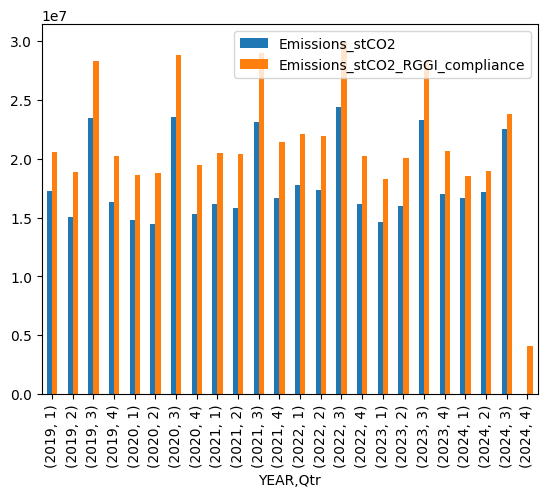

In [48]:
gen_df_with_coeff.query('RGGI_state==1').groupby(['YEAR','Qtr'])[['Emissions_stCO2','Emissions_stCO2_RGGI_compliance']].sum().plot.bar()

In [49]:
rggi_quaterly = RGGI_compliance.query('State!=["VA","PA"]').groupby(['Year','Qtr'])['Compliance Emissions (Tons)'].sum().to_frame('RGGI_compliance')

In [50]:
rggi_quaterly.index.names = ['YEAR','Qtr']

In [51]:
full_summary  = gen_df_with_coeff.query('RGGI_state==1').groupby(['YEAR','Qtr'])[['Emissions_stCO2','Emissions_stCO2_RGGI_compliance']].sum().join(rggi_quaterly)

<AxesSubplot:xlabel='YEAR,Qtr'>

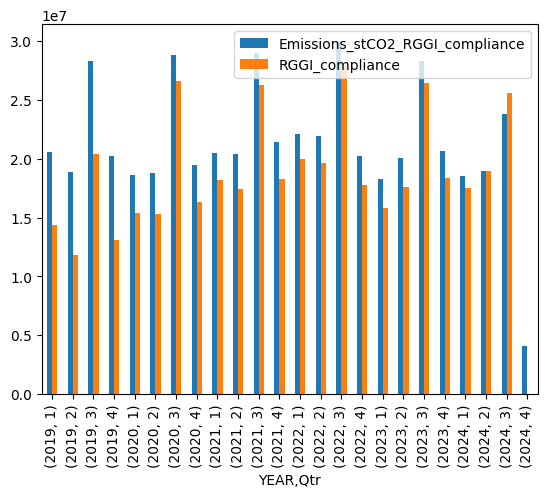

In [52]:
full_summary[['Emissions_stCO2_RGGI_compliance','RGGI_compliance']].plot.bar()

In [54]:
#full_summary.loc[2023,4].transpose()*(full_summary.pct_change().loc[2024]+1).cumprod().cumsum().plot()

In [381]:
full_summary

Emissions_stCO2  Emissions_stCO2_RGGI_compliance  RGGI_compliance
YEAR Qtr                                                                   
2019 1       1.727846e+07                     2.059821e+07     1.438917e+07
     2       1.500828e+07                     1.887431e+07     1.178843e+07
     3       2.345803e+07                     2.831361e+07     2.037115e+07
     4       1.627903e+07                     2.022388e+07     1.310057e+07
2020 1       1.475956e+07                     1.864178e+07     1.536198e+07
     2       1.442013e+07                     1.880570e+07     1.533407e+07
     3       2.354983e+07                     2.885783e+07     2.664452e+07
     4       1.534093e+07                     1.950269e+07     1.634439e+07
2021 1       1.616136e+07                     2.046730e+07     1.822273e+07
     2       1.582122e+07                     2.042342e+07     1.739252e+07
     3       2.311002e+07                     2.895428e+07     2.623616e+07
     4       1.667220e+07                     2.142987e+07     1.823489e+07
2022 1       1.780839e+07                     2.207900e+07     1.999364e+07
     2       1.736345e+07                     2.196100e+07     1.967853e+07
     3       2.439055e+07                     2.992679e+07     2.785781e+07
     4       1.614472e+07                     2.023372e+07     1.777226e+07
2023 1       1.465262e+07                     1.830114e+07     1.584495e+07
     2       1.595744e+07                     2.009943e+07     1.757006e+07
     3       2.331200e+07                     2.827722e+07     2.646729e+07
     4       1.701966e+07                     2.064901e+07     1.836940e+07
2024 1       1.667863e+07                     1.849550e+07     1.748652e+07
     2       1.717971e+07                     1.897958e+07     1.894759e+07
     3       2.251405e+07                     2.382784e+07     2.559990e+07
     4       0.000000e+00                     4.037628e+06              NaN

In [55]:
fig = px.scatter(full_summary.pct_change().reset_index().iloc[:-1],x='Emissions_stCO2_RGGI_compliance',y='RGGI_compliance',hover_data=['YEAR','Qtr'],trendline='ols',width=800,
           title='Full QoQ % change Estimated vs Actual RGG Emissions Fit')
fig.update_layout(yaxis_tickformat='.0%',xaxis_tickformat='.0%')
fig.show()

In [56]:
px.get_trendline_results(fig).iloc[0][0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     472.5
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.19e-15
Time:                        11:28:28   Log-Likelihood:                 28.091
No. Observations:                  22   AIC:                            -52.18
Df Residuals:                      20   BIC:                            -50.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0289      0.015      1.894      0.073      -0.003       0.061
x1             1.2487      0.057     21.736      0.000       1.129       1.369
==============================================================================
Omnibus:                       22.529   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.028
Skew:                           1.863   Prob(JB):                     2.48e-08
Kurtosis:                       7.933   Cond. No.                         3.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
############ TUrn below into own class - Gen Long term Model

In [ ]:
def generate_full_generation_forecast_ISO(gen_df,ISO,CAGR):
    gen_df['cap_utilisation'] = gen_df['Generation MWh_clipped']/(gen_df['Date'].dt.day*24*gen_df['Nameplate Capacity (MW)'])
    this_year = dt.today().year
    isne_gen = gen_df[gen_df['Balancing\nAuthority Code']==ISO]
    isne_gen_avg_monthly_cap_factor = isne_gen.groupby(['PJM_tech','YEAR','month'])['cap_utilisation'].median().unstack('PJM_tech').loc[this_year-3:this_year-1].reset_index().groupby('month').mean().iloc[:,1:]
    
    CA_exports =  pd.read_csv('canadian_exports.csv',index_col=0,parse_dates=True)

    CA_exports_monthly =  CA_exports.resample('M').sum()
    total_isone = isne_gen.groupby('Date')['Generation MWh_clipped'].sum().to_frame('local_gen')
    try:
        total_isone_and_imports =  total_isone.join(CA_exports_monthly[ISO].to_frame('CA_imports'))
    except:
        total_isone_and_imports =  total_isone
        total_isone_and_imports['CA_imports']=0

    total_isone_and_imports['total_power_demand'] = total_isone_and_imports.sum(axis=1)
    total_isone_and_imports['total_power_demand'].resample('Y').sum().loc[:f'{this_year-1}'].iloc[0]
    demand_growth = {this_year-1:total_isone_and_imports['total_power_demand'].resample('Y').sum().loc[:f'{this_year-1}'].iloc[0]}
    #CAGR = 0.01
    for year in range(this_year,this_year+7):
        demand_growth[year] = demand_growth[year-1]*(1+CAGR)


    total_isone_and_imports['month'] =  total_isone_and_imports.index.month
    total_isone_and_imports['year'] = total_isone_and_imports.index.year
    total_isone_and_imports= total_isone_and_imports.join(total_isone_and_imports.groupby('year')['total_power_demand'].sum().to_frame('annual_demand'),on='year')
    total_isone_and_imports['demand_share_annual'] = total_isone_and_imports['total_power_demand']/total_isone_and_imports['annual_demand']

    average_monthly_demand = total_isone_and_imports.loc[f'{this_year-3}':f'{this_year-1}'].groupby('month')['demand_share_annual'].mean()
    forecast_power_demand = pd.DataFrame()
    for x in demand_growth.keys():
        demand_forecast = (average_monthly_demand*demand_growth[x]).to_frame('demand_forecast') 
        demand_forecast['year']=x
        forecast_power_demand = pd.concat([forecast_power_demand,demand_forecast])

    forecast_power_demand['Date'] = pd.to_datetime('01/'+forecast_power_demand.index.astype(str)+'/'+forecast_power_demand['year'].astype(str),format='%d/%m/%Y')+pd.offsets.MonthEnd()
    total_isone_and_imports_fcast = pd.concat([total_isone_and_imports,forecast_power_demand.reset_index().set_index('Date')['demand_forecast'].to_frame()],join='outer',axis=0)
    total_isone_and_imports_fcast['total_power_demand_lim'] = np.where(total_isone_and_imports_fcast.index<f'{this_year}',total_isone_and_imports_fcast['total_power_demand'],np.nan)
    total_isone_and_imports_fcast['demand_forecast_lim'] = np.where(total_isone_and_imports_fcast.index<f'{this_year}',np.nan,total_isone_and_imports_fcast['demand_forecast'])
    total_isone_and_imports_fcast['month'] = total_isone_and_imports_fcast.index.month
    total_isone_and_imports_fcast['year'] = total_isone_and_imports_fcast.index.year
    median_monthly_CAN_improts = total_isone_and_imports_fcast.groupby('month')['CA_imports'].median().to_frame('median_CAN_imports')
    total_isone_and_imports_fcast = total_isone_and_imports_fcast.join(median_monthly_CAN_improts,on='month')
    total_isone_and_imports_fcast['median_CAN_imports'] = np.where(pd.isna(total_isone_and_imports_fcast['CA_imports']),total_isone_and_imports_fcast['median_CAN_imports'],np.nan)
    total_isone_and_imports_fcast['demand_forecast_domestic_gen']  = total_isone_and_imports_fcast['demand_forecast_lim'] - np.where(pd.isna(total_isone_and_imports_fcast['CA_imports']),
                                                                                                                                    total_isone_and_imports_fcast['median_CAN_imports'],total_isone_and_imports_fcast['CA_imports'])
    total_isone_and_imports_fcast['local_gen_lim'] = np.where(total_isone_and_imports_fcast.index<f'{this_year}',total_isone_and_imports_fcast['local_gen'],np.nan)
    total_isone_and_imports_fcast = total_isone_and_imports_fcast.groupby('Date').mean()

    ##Generation forecast
    future_capacity = isne_planned_retired.stack().to_frame('Capacity')
    future_capacity['month'] = future_capacity.index.get_level_values(0).month
    future_capacity = future_capacity.reset_index().join(isne_gen_avg_monthly_cap_factor.stack().to_frame('Cap_factor'),on=['month','level_1'])
    future_capacity['Cap_factor'] = np.where((future_capacity['level_1']=='Storage') & (pd.isna(future_capacity['Cap_factor'])),0.1,future_capacity['Cap_factor'])
    future_capacity['days_in_month'] = (future_capacity['level_0']+pd.offsets.MonthEnd()).dt.day
    future_capacity['Generation_est'] = future_capacity['days_in_month']*24*future_capacity['Capacity']*future_capacity['Cap_factor']

    supply = future_capacity.groupby(['level_0','level_1'])['Generation_est'].sum().unstack('level_1').sum(axis=1).to_frame('Total_supply')
    supply.index = supply.index+pd.offsets.MonthEnd()
    s_and_d = total_isone_and_imports_fcast.join(supply)
    s_and_d['extra_fossil_gen_needed']  = s_and_d['demand_forecast_domestic_gen'] -s_and_d['Total_supply'] 
    fossil_curtailment = s_and_d[['extra_fossil_gen_needed','demand_forecast_domestic_gen','Total_supply']]
    fossil_curtailment.index = fossil_curtailment.index-pd.offsets.MonthBegin()
    unconstrained_supply = future_capacity.groupby(['level_0','level_1'])['Generation_est'].sum().unstack('level_1')
    constrained_supply = unconstrained_supply.join(fossil_curtailment)
    constrained_supply['Gas'] = constrained_supply['Gas'] + constrained_supply['extra_fossil_gen_needed'].fillna(0)
    
    fig = px.area(constrained_supply.iloc[:,:-3],labels={'value':'MWh'},title='Constrained S&D Forecast',width=800)
    fig.add_scatter(x = constrained_supply.index,y=constrained_supply['demand_forecast_domestic_gen'],line={'color':'black','width':3,'dash':'dot'},name='Demand')
    
    EF_df = isne_gen.groupby('PJM_tech')[['Generation MWh_clipped','Emissions_stCO2_RGGI_compliance']].sum()
    EF_df['Emissions_intensity (stCo2/MWh)'] = EF_df['Emissions_stCO2_RGGI_compliance']/EF_df['Generation MWh_clipped']
    EF_df['Emissions_intensity (stCo2/MWh)'].to_dict()
    constrained_supply_stacked = constrained_supply.stack().to_frame('Gen MWh')
    constrained_supply_stacked = constrained_supply_stacked.reset_index()
    constrained_supply_stacked['emissions_factor'] = constrained_supply_stacked['level_1'].map(EF_df['Emissions_intensity (stCo2/MWh)'].to_dict())
    constrained_supply_stacked['emissions'] = constrained_supply_stacked['emissions_factor']*constrained_supply_stacked['Gen MWh']
    emissions = constrained_supply_stacked.reset_index().groupby(['level_0','level_1'])['emissions'].sum().unstack('level_1')
    monthly_emissions_fig = px.bar(emissions,labels={'value':'Emissions stCO2'},width=800,title='Monthly Emissions Forecast for ISONE')
    annual_emissions = emissions.resample('Y').sum().sum(axis=1)
    annual_emissions = annual_emissions.to_frame('emissions')
    annual_emissions['year'] = annual_emissions.index.year

    return annual_emissions,fig,constrained_supply,monthly_emissions_fig,constrained_supply_stacked

In [432]:
iso_dict = {}
CAGR_dict  = {'ISNE':0.01,
              'NYIS':0.01,
              'PJM':0.025}

for iso in ['ISNE','NYIS','PJM']:
    cagr = CAGR_dict[iso]
    annual_emissions,fig,constrained_supply,monthly_emissions_fig,constrained_supply_stacked = generate_full_generation_forecast_ISO(gen_df_with_coeff,iso,cagr)
    iso_dict[iso] = [annual_emissions,fig,constrained_supply,monthly_emissions_fig,constrained_supply_stacked]

In [433]:
annual_df = iso_dict['ISNE'][0]
annual_df['ISO']='ISNE'
annual_df_ny = iso_dict['NYIS'][0]
annual_df_ny['ISO']='NYIS'


In [434]:
gen_df_with_coeff.query('Date>"2024-11-30" and Emissions_stCO2_RGGI_compliance>0')

,Plant Id,Plant Name,Reported\nFuel Type Code,Plant State,Balancing\nAuthority Code,RGGI_state,YEAR,level_7,Generation MWh,month,...,Gap_fill_capacity_overall,Emissions_stCO2,PJM_tech,Generation MWh_clipped,Dual_fuel,Qtr,const,x1,Emissions_stCO2_RGGI_compliance,cap_utilisation
2483,568,Bridgeport Station,DFO,CT,ISNE,1,2024,Netgen\nDecember,0.0,12,...,NaN,0.0,Oil,0.0,NaN,4,63170.922026,1.013573,63170.922026,NaN
2567,568,Bridgeport Station,KER,CT,ISNE,1,2024,Netgen\nDecember,0.0,12,...,18.600000,0.0,Oil,0.0,NaN,4,63170.922026,1.013573,63170.922026,NaN
2639,568,Bridgeport Station,NG,CT,ISNE,1,2024,Netgen\nDecember,0.0,12,...,576.300000,0.0,Gas,0.0,NaN,4,63170.922026,1.013573,63170.922026,NaN
3491,594,Indian River Generating Station,BIT,DE,PJM,1,2024,Netgen\nDecember,0.0,12,...,445.500000,0.0,Coal,0.0,NaN,4,737.259355,1.007366,737.259355,NaN
3563,594,Indian River Generating Station,DFO,DE,PJM,1,2024,Netgen\nDecember,0.0,12,...,18.600000,0.0,Oil,0.0,NaN,4,737.259355,1.007366,737.259355,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131243,57185,Cricket Valley Energy,NG,NY,NYIS,1,2024,Netgen\nDecember,0.0,12,...,1312.500000,0.0,Gas,0.0,NaN,4,4566.007947,1.225819,4566.007947,NaN
132911,57349,Garrison Energy Center LLC,DFO,DE,PJM,1,2024,Netgen\nDecember,0.0,12,...,NaN,0.0,Oil,0.0,NaN,4,490.419527,1.229328,490.419527,NaN
132983,57349,Garrison Energy Center LLC,NG,DE,PJM,1,2024,Netgen\nDecember,0.0,12,...,361.000000,0.0,Gas,0.0,NaN,4,490.419527,1.229328,490.419527,NaN
173495,59882,Exelon West Medway II LLC,KER,MA,ISNE,1,2024,Netgen\nDecember,0.0,12,...,NaN,0.0,Oil,0.0,NaN,4,1228.446659,1.136739,1228.446659,NaN


In [435]:
iso_dict['ISNE'][-1].level_0.unique()[0]

numpy.datetime64('2024-09-01T00:00:00.000000000')

In [436]:
forecast_rggi_pjm_share = full_time_series.copy().reset_index()

In [437]:
forecast_rggi_pjm_share.Date = forecast_rggi_pjm_share.Date-pd.offsets.MonthBegin()

In [438]:
PJM_stacked_gen = iso_dict['PJM'][-1].join(forecast_rggi_pjm_share.set_index(['Date','PJM_tech'])['RGGI_share'],on=['level_0','level_1'])

In [439]:
PJM_stacked_gen['RGGI_gen'] = PJM_stacked_gen['Gen MWh']*PJM_stacked_gen['RGGI_share']
PJM_stacked_gen['RGGI_emissions'] = PJM_stacked_gen['RGGI_gen'] * PJM_stacked_gen['emissions_factor'] 

In [440]:
pjm_annual_df = PJM_stacked_gen.set_index('level_0').resample('Y')['RGGI_emissions'].sum().to_frame('emissions')

In [441]:
pjm_annual_df['year'] = pjm_annual_df.index.year
pjm_annual_df['ISO'] = 'RGGI-PJM'

In [442]:
combo_annual_df = pd.concat([annual_df,annual_df_ny,pjm_annual_df])

In [443]:
ytd_emissions = pd.DataFrame(index=['2024-12-31'],columns=['emissions','year','ISO'],data=[[gen_df_with_coeff.query(f'Date<"{iso_dict["ISNE"][-1].level_0.unique()[0]}"').groupby('YEAR')['Emissions_stCO2_RGGI_compliance'].sum()[2024]
                                                                                            ,2024,'YTD actual']])

In [444]:
combo_annual_df = combo_annual_df.append(ytd_emissions)

C:\Users\Alex Child\AppData\Local\Temp\ipykernel_19656\2490423558.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [445]:
px.bar(combo_annual_df.query('year<=2030'),x='year',y='emissions',color='ISO',title='RGGI Long Term Emissions Forecast',width=800)

C:\Users\Alex Child\AppData\Local\Temp\ipykernel_19656\3577885118.py:1: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])

